In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print("OK")

OK


In [3]:
!pip install pandas_datareader 

In [4]:
import pandas as pd 
from pandas_datareader import data, wb 
import matplotlib.pyplot as plt 

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [6]:
%matplotlib inline 
pd.set_option('display.max_colwidth', 200) 
print("ok")

ok


In [10]:
import pandas_datareader as pdr 
 
start_date = pd.to_datetime('2010-01-01') 
stop_date = pd.to_datetime('2020-09-01') 
 
spy = pdr.data.get_data_yahoo('SPY', start_date, stop_date) 
print("ok")

ok


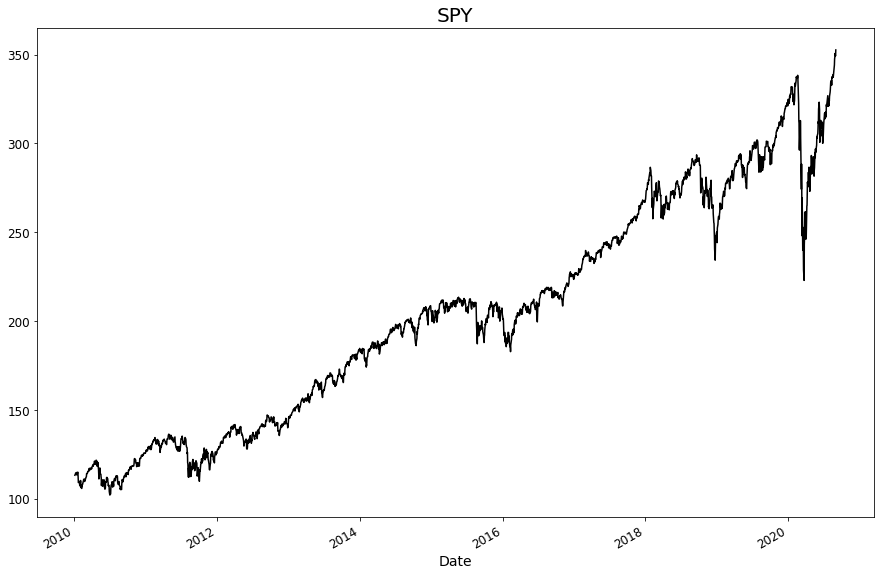

In [11]:
spy_c = spy['Close'] 
 
fig, ax = plt.subplots(figsize=(15,10)) 
spy_c.plot(color='k') 
plt.title("SPY", fontsize=20); 

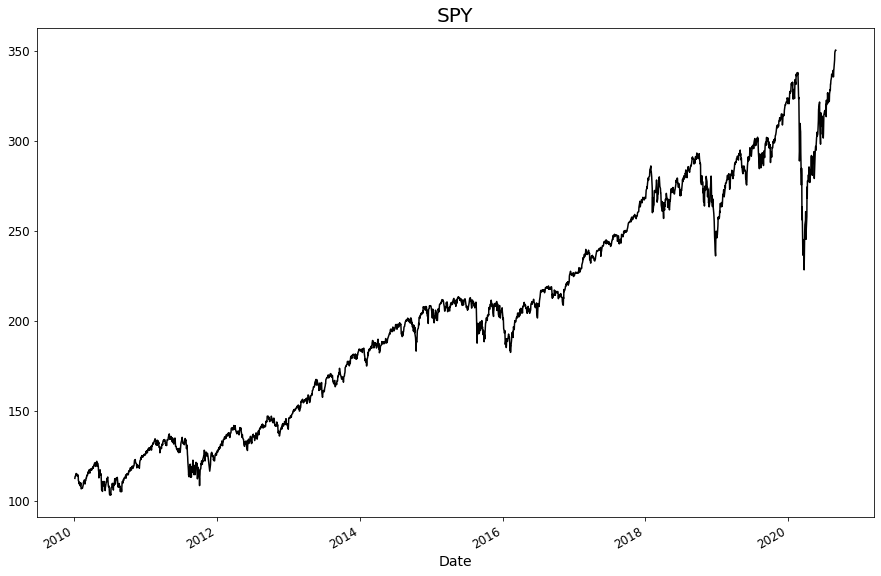

In [12]:
spy_c = spy['Open'] 
 
fig, ax = plt.subplots(figsize=(15,10)) 
spy_c.plot(color='k') 
plt.title("SPY", fontsize=20); 

Analysis of data 

In [16]:
spy['Daily Change'] = pd.Series(spy['Close'] - spy['Open']) 
spy['Daily Change'] 

Date
2010-01-04    0.959999
2010-01-05    0.369995
2010-01-06    0.190002
2010-01-07    0.690002
2010-01-08    0.680000
                ...   
2020-08-26    2.809998
2020-08-27   -0.180023
2020-08-28    1.139984
2020-08-31   -1.040009
2020-09-01    2.390015
Name: Daily Change, Length: 2685, dtype: float64

In [19]:
 spy[spy['Daily Change']<0]['Daily Change'].mean() 
 

-1.126566747475786

In [21]:
# Daily return 
daily_rtn = ((spy['Close'] - spy['Close'].shift(1))/spy['Close'].shift(1))*100 
 
id_rtn = ((spy['Close'] - spy['Open'])/spy['Open'])*100 
  
on_rtn = ((spy['Open'] - spy['Close'].shift(1))/spy['Close'].shift(1))*100 

daily_rtn 

Date
2010-01-04         NaN
2010-01-05    0.264710
2010-01-06    0.070406
2010-01-07    0.422129
2010-01-08    0.332776
                ...   
2020-08-26    1.002561
2020-08-27    0.218655
2020-08-28    0.645939
2020-08-31   -0.362254
2020-09-01    0.941859
Name: Close, Length: 2685, dtype: float64

In [22]:
def get_stats(s, n=252): 
    s = s.dropna() 
    wins = len(s[s>0]) 
    losses = len(s[s<0]) 
    evens = len(s[s==0]) 
    mean_w = round(s[s>0].mean(), 3) 
    mean_l = round(s[s<0].mean(), 3) 
    win_r = round(wins/losses, 3) 
    mean_trd = round(s.mean(), 3) 
    sd = round(np.std(s), 3) 
    max_l = round(s.min(), 3) 
    max_w = round(s.max(), 3) 
    sharpe_r = round((s.mean()/np.std(s))*np.sqrt(n), 4) 
    cnt = len(s) 
    print('Trades:', cnt,\ 
          '\nWins:', wins,\ 
          '\nLosses:', losses,\ 
          '\nBreakeven:', evens,\ 
          '\nWin/Loss Ratio', win_r,\ 
          '\nMean Win:', mean_w,\ 
          '\nMean Loss:', mean_l,\ 
          '\nMean', mean_trd,\ 
          '\nStd Dev:', sd,\ 
          '\nMax Loss:', max_l,\ 
          '\nMax Win:', max_w,\ 
          '\nSharpe Ratio:', sharpe_r) 

SyntaxError: ignored

In [ ]:
get_stats(daily_rtn) 

Text(0.5, 1.0, 'SPY')

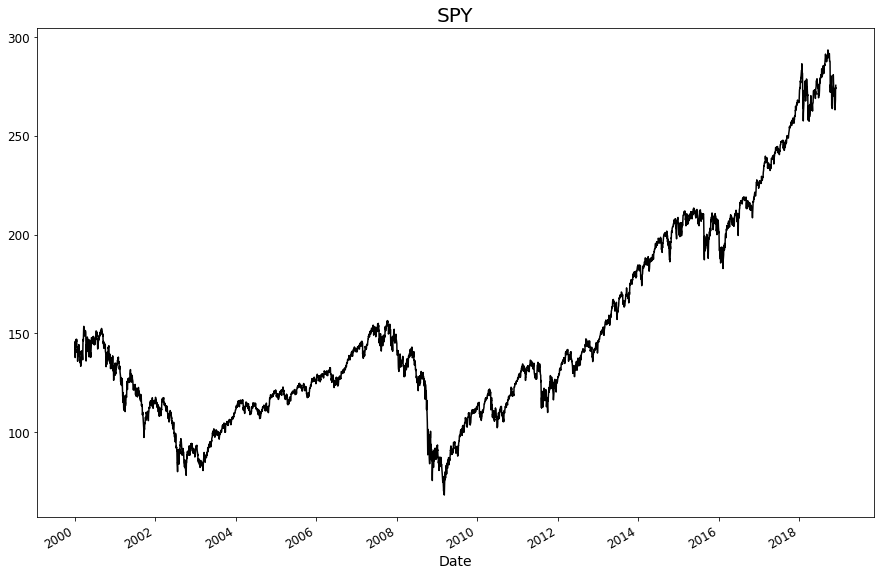

In [24]:
start_date = pd.to_datetime('2000-01-01') 
stop_date = pd.to_datetime('2018-12-01') 
 
sp = pdr.data.get_data_yahoo('SPY', start_date, stop_date) 

fig, ax = plt.subplots(figsize=(15,10)) 
sp['Close'].plot(color='k') 
plt.title("SPY", fontsize=20) 

BUILD REGRESSION MODEL 

In [27]:
for i in range(1, 21, 1): 
  sp.loc[:,'Close Minus ' + str(i)] = sp['Close'].shift(i) 
 
sp20 = sp[[x for x in sp.columns if 'Close Minus' in x or x == 'Close']].iloc[20:,] 
 
sp20 

,Close,Close Minus 1,Close Minus 2,Close Minus 3,Close Minus 4,Close Minus 5,Close Minus 6,Close Minus 7,Close Minus 8,Close Minus 9,Close Minus 10,Close Minus 11,Close Minus 12,Close Minus 13,Close Minus 14,Close Minus 15,Close Minus 16,Close Minus 17,Close Minus 18,Close Minus 19,Close Minus 20
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000,139.750000,145.437500
2000-02-02,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000,139.750000
2000-02-03,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000
2000-02-04,142.593750,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000
2000-02-07,142.375000,142.593750,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-26,267.500000,263.250000,265.019989,264.119995,269.100006,273.730011,273.019989,270.200012,272.059998,272.570007,277.760010,280.500000,281.010010,275.119995,273.390015,271.890015,273.510010,270.630005,267.769989,263.859985,265.329987
2018-11-27,268.399994,267.500000,263.250000,265.019989,264.119995,269.100006,273.730011,273.019989,270.200012,272.059998,272.570007,277.760010,280.500000,281.010010,275.119995,273.390015,271.890015,273.510010,270.630005,267.769989,263.859985
2018-11-28,274.579987,268.399994,267.500000,263.250000,265.019989,264.119995,269.100006,273.730011,273.019989,270.200012,272.059998,272.570007,277.760010,280.500000,281.010010,275.119995,273.390015,271.890015,273.510010,270.630005,267.769989


In [29]:
sp20 = sp20.iloc[:,::-1] 
sp20

,Close,Close Minus 1,Close Minus 2,Close Minus 3,Close Minus 4,Close Minus 5,Close Minus 6,Close Minus 7,Close Minus 8,Close Minus 9,Close Minus 10,Close Minus 11,Close Minus 12,Close Minus 13,Close Minus 14,Close Minus 15,Close Minus 16,Close Minus 17,Close Minus 18,Close Minus 19,Close Minus 20
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000,139.750000,145.437500
2000-02-02,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000,139.750000
2000-02-03,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000
2000-02-04,142.593750,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000
2000-02-07,142.375000,142.593750,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-26,267.500000,263.250000,265.019989,264.119995,269.100006,273.730011,273.019989,270.200012,272.059998,272.570007,277.760010,280.500000,281.010010,275.119995,273.390015,271.890015,273.510010,270.630005,267.769989,263.859985,265.329987
2018-11-27,268.399994,267.500000,263.250000,265.019989,264.119995,269.100006,273.730011,273.019989,270.200012,272.059998,272.570007,277.760010,280.500000,281.010010,275.119995,273.390015,271.890015,273.510010,270.630005,267.769989,263.859985
2018-11-28,274.579987,268.399994,267.500000,263.250000,265.019989,264.119995,269.100006,273.730011,273.019989,270.200012,272.059998,272.570007,277.760010,280.500000,281.010010,275.119995,273.390015,271.890015,273.510010,270.630005,267.769989


In [31]:
# Start training
from sklearn.svm import SVR 

clf = SVR(kernel='linear') 
 
X_train = sp20[:-2000] 
y_train = sp20['Close'].shift(-1)[:-2000] 
 
X_test = sp20[-2000:] 
y_test = sp20['Close'].shift(-1)[-2000:] 

In [32]:
model = clf.fit(X_train, y_train) 
 
preds = model.predict(X_test) 

In [33]:
tf = pd.DataFrame(list(zip(y_test, preds)), columns=['Next Day Close', 'Predicted Next Close'], index=y_test.index) 
 
tf 

,Next Day Close,Predicted Next Close
Date,,
2010-12-22,125.599998,125.796373
2010-12-23,125.650002,125.870888
2010-12-27,125.830002,125.682639
2010-12-28,125.919998,125.864078
2010-12-29,125.720001,125.892762
...,...,...
2018-11-26,268.399994,267.498317
2018-11-27,274.579987,267.974248
2018-11-28,273.980011,274.281718


PERFORMANCE OF MODEL

In [39]:
cdc = sp[['Close']].iloc[-2000:] 
ndo = sp[['Open']].iloc[-2000:].shift(-1) 
 
tf1 = pd.merge(tf, cdc, left_index=True, right_index=True) 
tf2 = pd.merge(tf1, ndo, left_index=True, right_index=True) 
tf2.columns = ['Next Day Close', 'Predicted Next Close', 'Current Day Close', 'Next Day Open'] 
 
tf2 

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open
Date,,,,
2010-12-22,125.599998,125.796373,125.779999,125.639999
2010-12-23,125.650002,125.870888,125.599998,125.129997
2010-12-27,125.830002,125.682639,125.650002,125.900002
2010-12-28,125.919998,125.864078,125.830002,125.980003
2010-12-29,125.720001,125.892762,125.919998,125.800003
...,...,...,...,...
2018-11-26,268.399994,267.498317,267.500000,266.339996
2018-11-27,274.579987,267.974248,268.399994,269.600006
2018-11-28,273.980011,274.281718,274.579987,273.709991


In [40]:
def get_signal(r): 
    if r['Predicted Next Close'] > r['Next Day Open']: 
        return 1 
    else: 
        return 0 
 
def get_ret(r): 
    if r['Signal'] == 1: 
        return ((r['Next Day Close'] - r['Next Day Open'])/r['Next Day Open']) * 100 
    else: 
        return 0 
 
tf2 = tf2.assign(Signal = tf2.apply(get_signal, axis=1)) 
tf2 = tf2.assign(PnL = tf2.apply(get_ret, axis=1)) 
 
tf2 

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open,Signal,PnL
Date,,,,,,
2010-12-22,125.599998,125.796373,125.779999,125.639999,1,-0.031838
2010-12-23,125.650002,125.870888,125.599998,125.129997,1,0.415571
2010-12-27,125.830002,125.682639,125.650002,125.900002,0,0.000000
2010-12-28,125.919998,125.864078,125.830002,125.980003,0,0.000000
2010-12-29,125.720001,125.892762,125.919998,125.800003,1,-0.063594
...,...,...,...,...,...,...
2018-11-26,268.399994,267.498317,267.500000,266.339996,1,0.773447
2018-11-27,274.579987,267.974248,268.399994,269.600006,0,0.000000
2018-11-28,273.980011,274.281718,274.579987,273.709991,1,0.098652


In [42]:
# (tf2[tf2['Signal']==1]['Next Day Close'] - tf2[tf2['Signal']==1]['Next Day Open']).sum() 
(sp['Close'].iloc[-2000:] - sp['Open'].iloc[-2000:]).sum() 

58.98988342285156

In [34]:
# Dynamic time warping
!pip install fastdtw 

In [36]:
from scipy.spatial.distance import euclidean 
from fastdtw import fastdtw 

In [37]:
def dtw_dist(x, y): 
    distance, path = fastdtw(x, y, dist=euclidean) 
    return distance 

In [43]:
tseries = [] 
tlen = 5 
for i in range(tlen, len(sp), tlen): 
    pctc = sp['Close'].iloc[i-tlen:i].pct_change()[1:].values * 100 
    res = sp['Close'].iloc[i-tlen:i+1].pct_change()[-1] * 100 
    tseries.append((pctc, res)) 

In [44]:
tseries[0] 

(array([-3.91061453,  0.17889088, -1.60714286,  5.8076225 ]),
 0.34305317324185847)

In [47]:
dist_pairs = []
len_test = 100 
for i in range(len_test): 
    for j in range(len_test): 
        dist = dtw_dist(tseries[i][0], tseries[j][0]) 
        dist_pairs.append((i,j,dist,tseries[i][1], tseries[j][1])) 

In [49]:
dist_frame = pd.DataFrame(dist_pairs, columns=['A','B','Dist', 'A Ret', 'B Ret']) 
 
sf = dist_frame[dist_frame['Dist']>0].sort_values(['A','B']).reset_index(drop=1) 
 
sfe = sf[sf['A']<sf['B']] 

In [50]:
winf = sfe[(sfe['Dist']<=1)&(sfe['A Ret']>0)] 
 
winf 

,A,B,Dist,A Ret,B Ret
464,4,69,0.778630,1.360843,-1.696072
1610,16,27,0.849543,0.754885,-0.571308
2949,29,79,0.857039,1.195559,-0.546447
3037,30,68,0.713362,1.271995,2.357512
3042,30,73,0.950903,1.271995,1.135342
3246,32,79,0.984094,0.340909,-0.546447
4425,44,70,0.697951,0.510441,0.518750
5218,52,71,0.456561,0.664568,0.360134
6804,68,73,0.923870,2.357512,1.135342
7305,73,79,0.913535,1.135342,-0.546447


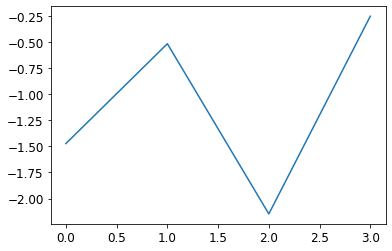

In [51]:
plt.plot(np.arange(4), tseries[6][0]); 

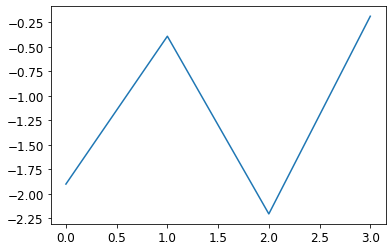

In [52]:
plt.plot(np.arange(4), tseries[598][0]) 

In [ ]:
EVALUATING


In [53]:
excluded = {} 
return_list = [] 
def get_returns(r): 
    if excluded.get(r['A']) is None: 
        return_list.append(r['B Ret']) 
        if r['B Ret'] < 0: 
            excluded.update({r['A']:1}) 
 
winf.apply(get_returns, axis=1); 